In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [43]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [3]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNetCV
# from sklearn.svm.LinearSVR


In [4]:
continuous_data = pd.read_csv('../data/train/datacontinuousstudents_train.csv')

In [5]:
continuous_data.head(10)

,id,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32
0,1,-0.852667,49.856000,118.8,1,0,0,0,0,16.32096,...,0.9709,0.0003,6,6,24.7138,0,0,7,0.056546,0.112860
1,3,5.951199,66.725000,41.8,0,1,0,0,0,17.07023,...,0.9650,0.0000,6,6,48.3807,0,1,4,0.067855,0.133944
2,4,-2.030599,41.696000,132.0,0,0,1,0,0,16.31460,...,0.0091,0.0001,6,4,59.8410,0,0,7,0.133230,0.260102
3,5,-6.143410,71.351000,24.2,1,0,0,0,0,11.10790,...,0.0051,0.0000,5,7,175.9250,0,0,3,0.318584,0.627729
4,7,0.174651,67.879000,42.3,0,0,0,0,1,15.07912,...,0.0022,0.0001,7,3,81.3357,0,0,5,0.219665,0.436101
5,9,0.168219,75.568293,8.0,0,0,0,0,0,15.85385,...,0.0204,0.0000,8,4,73.9691,1,0,1,0.285290,0.539237
6,10,3.072744,64.827000,75.9,0,0,0,0,0,15.78388,...,0.9000,0.0000,7,3,83.0969,0,0,5,0.185113,0.342531
7,11,-0.730155,70.705000,19.6,1,0,0,0,0,12.45424,...,0.0000,0.0000,6,6,110.1200,0,0,2,0.292938,0.583095
8,12,2.414692,72.390000,19.6,1,0,0,0,0,13.11419,...,0.8635,0.0002,6,6,210.1610,0,0,6,0.244678,0.442987
9,14,-5.510573,71.383000,16.0,1,0,0,0,0,12.46987,...,0.0042,0.0004,6,6,100.8310,0,0,1,0.431135,0.850350


In [6]:
count_variables = ['x9', 'x25', 'x26', 'x30']

C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


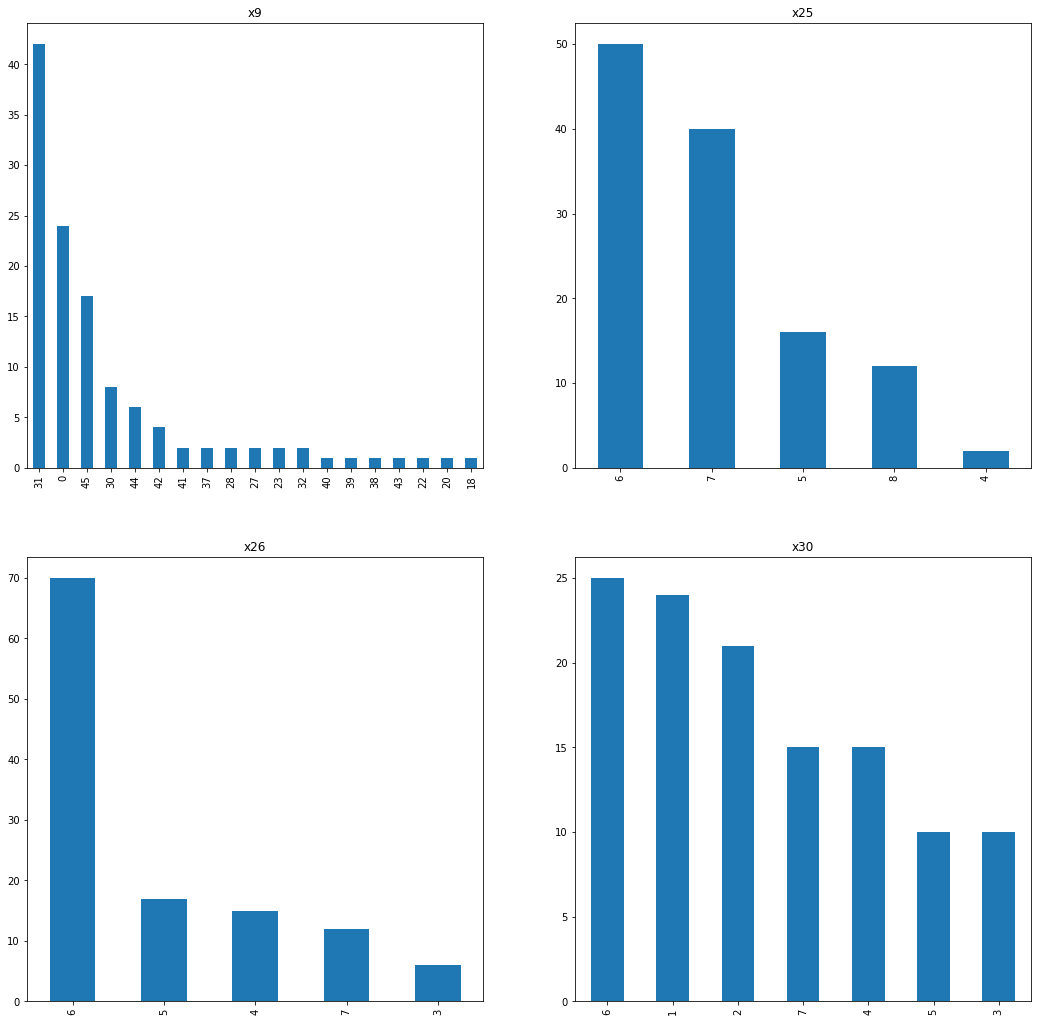

In [7]:
ROWS, COLS = 2, 2
fig, ax = plt.subplots(ROWS, COLS, figsize=(18, 18))
row, col = 0, 0
for i, count_feature in enumerate(count_variables):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    continuous_data[count_feature].value_counts().plot('bar', ax=ax[row, col]).set_title(count_feature)

In [8]:
ids = continuous_data['id']

In [9]:
continuous_data.drop(['id'], axis=1, inplace=True)

In [14]:
target = continuous_data['y']
X = continuous_data.drop(['y'], axis=1)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 120 samples in 0.000s...
[t-SNE] Computed neighbors for 120 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 120 / 120
[t-SNE] Mean sigma: 3.380314
[t-SNE] Computed conditional probabilities in 0.002s
[t-SNE] Iteration 50: error = 75.5086975, gradient norm = 0.3980761 (50 iterations in 0.079s)
[t-SNE] Iteration 100: error = 71.6049500, gradient norm = 0.4902582 (50 iterations in 0.080s)
[t-SNE] Iteration 150: error = 67.8820496, gradient norm = 0.3940988 (50 iterations in 0.083s)
[t-SNE] Iteration 200: error = 66.7973175, gradient norm = 0.4549709 (50 iterations in 0.082s)
[t-SNE] Iteration 250: error = 73.6282120, gradient norm = 0.3375329 (50 iterations in 0.083s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.628212
[t-SNE] Iteration 300: error = 1.8645914, gradient norm = 0.0418894 (50 iterations in 0.073s)
[t-SNE] Iteration 350: error = 1.6668925, gradient norm = 0.0089802 (

[t-SNE] Iteration 750: error = 0.0205737, gradient norm = 0.0002777 (50 iterations in 0.082s)
[t-SNE] Iteration 800: error = 0.0205739, gradient norm = 0.0002151 (50 iterations in 0.095s)
[t-SNE] Iteration 850: error = 0.0205781, gradient norm = 0.0001864 (50 iterations in 0.093s)
[t-SNE] Iteration 850: did not make any progress during the last 300 episodes. Finished.
[t-SNE] KL divergence after 850 iterations: 0.020578


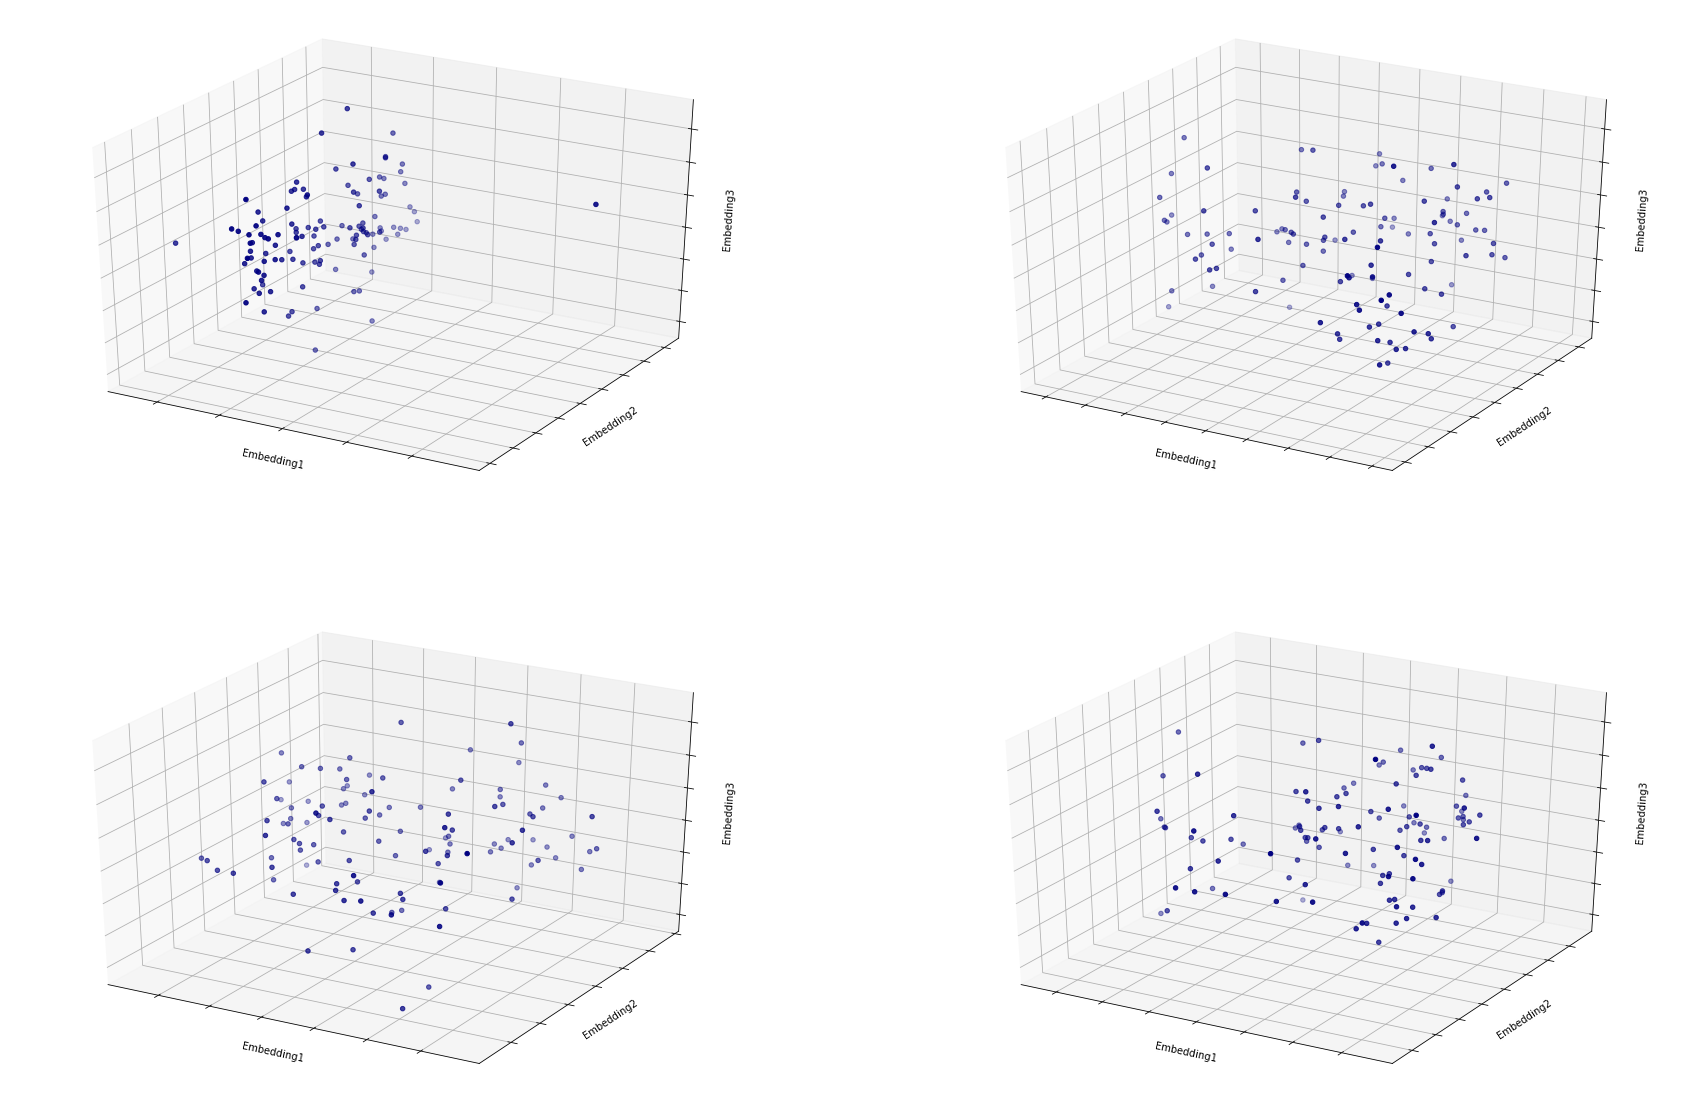

In [15]:
perplexities = [5, 30, 50, 100]


(fig, subplots) = plt.subplots(2, 2, figsize=(30, 20), subplot_kw=dict(projection='3d'))
plt.axis('tight')

for i, perplexity in enumerate(perplexities):
    ax = subplots[int(i/len(subplots))][int(i%len(subplots))]

    tsne = TSNE(n_components=2, init='random', verbose=100,
                         random_state=0, perplexity=perplexity, metric='cityblock')
    
    tsne_data = tsne.fit_transform(continuous_data)
    
    ax.scatter(tsne_data[:, 0], tsne_data[:, 1], target, c='navy')
    
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.zaxis.set_major_formatter(NullFormatter())
    
    ax.set_xlabel('Embedding1')
    ax.set_ylabel('Embedding2')
    ax.set_zlabel('Embedding3')
    
    ax.axis('tight')

In [16]:
data_with_dummies=pd.get_dummies(continuous_data, columns=['x25', 'x26', 'x30'])

In [17]:
data_with_dummies.head(10)

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x26_5,x26_6,x26_7,x30_1,x30_2,x30_3,x30_4,x30_5,x30_6,x30_7
0,-0.852667,49.856000,118.8,1,0,0,0,0,16.32096,0,...,0,1,0,0,0,0,0,0,0,1
1,5.951199,66.725000,41.8,0,1,0,0,0,17.07023,27,...,0,1,0,0,0,0,1,0,0,0
2,-2.030599,41.696000,132.0,0,0,1,0,0,16.31460,0,...,0,0,0,0,0,0,0,0,0,1
3,-6.143410,71.351000,24.2,1,0,0,0,0,11.10790,31,...,0,0,1,0,0,1,0,0,0,0
4,0.174651,67.879000,42.3,0,0,0,0,1,15.07912,31,...,0,0,0,0,0,0,0,1,0,0
5,0.168219,75.568293,8.0,0,0,0,0,0,15.85385,45,...,0,0,0,1,0,0,0,0,0,0
6,3.072744,64.827000,75.9,0,0,0,0,0,15.78388,31,...,0,0,0,0,0,0,0,1,0,0
7,-0.730155,70.705000,19.6,1,0,0,0,0,12.45424,31,...,0,1,0,0,1,0,0,0,0,0
8,2.414692,72.390000,19.6,1,0,0,0,0,13.11419,31,...,0,1,0,0,0,0,0,0,1,0
9,-5.510573,71.383000,16.0,1,0,0,0,0,12.46987,31,...,0,1,0,1,0,0,0,0,0,0


In [19]:
X_dummies = data_with_dummies.drop(['y'], axis=1)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 120 samples in 0.000s...
[t-SNE] Computed neighbors for 120 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 120 / 120
[t-SNE] Mean sigma: 3.378713
[t-SNE] Computed conditional probabilities in 0.001s
[t-SNE] Iteration 50: error = 75.0542145, gradient norm = 0.4177555 (50 iterations in 0.077s)
[t-SNE] Iteration 100: error = 72.0558548, gradient norm = 0.4203685 (50 iterations in 0.078s)
[t-SNE] Iteration 150: error = 73.7495193, gradient norm = 0.4167337 (50 iterations in 0.078s)
[t-SNE] Iteration 200: error = 68.9346085, gradient norm = 0.3919715 (50 iterations in 0.083s)
[t-SNE] Iteration 250: error = 72.3968735, gradient norm = 0.3186562 (50 iterations in 0.079s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.396873
[t-SNE] Iteration 300: error = 2.0812056, gradient norm = 0.0217723 (50 iterations in 0.074s)
[t-SNE] Iteration 350: error = 1.8481750, gradient norm = 0.0061984 (

[t-SNE] Iteration 650: error = 0.0205439, gradient norm = 0.0002424 (50 iterations in 0.078s)
[t-SNE] Iteration 700: error = 0.0206079, gradient norm = 0.0003831 (50 iterations in 0.080s)
[t-SNE] Iteration 700: did not make any progress during the last 300 episodes. Finished.
[t-SNE] KL divergence after 700 iterations: 0.020608


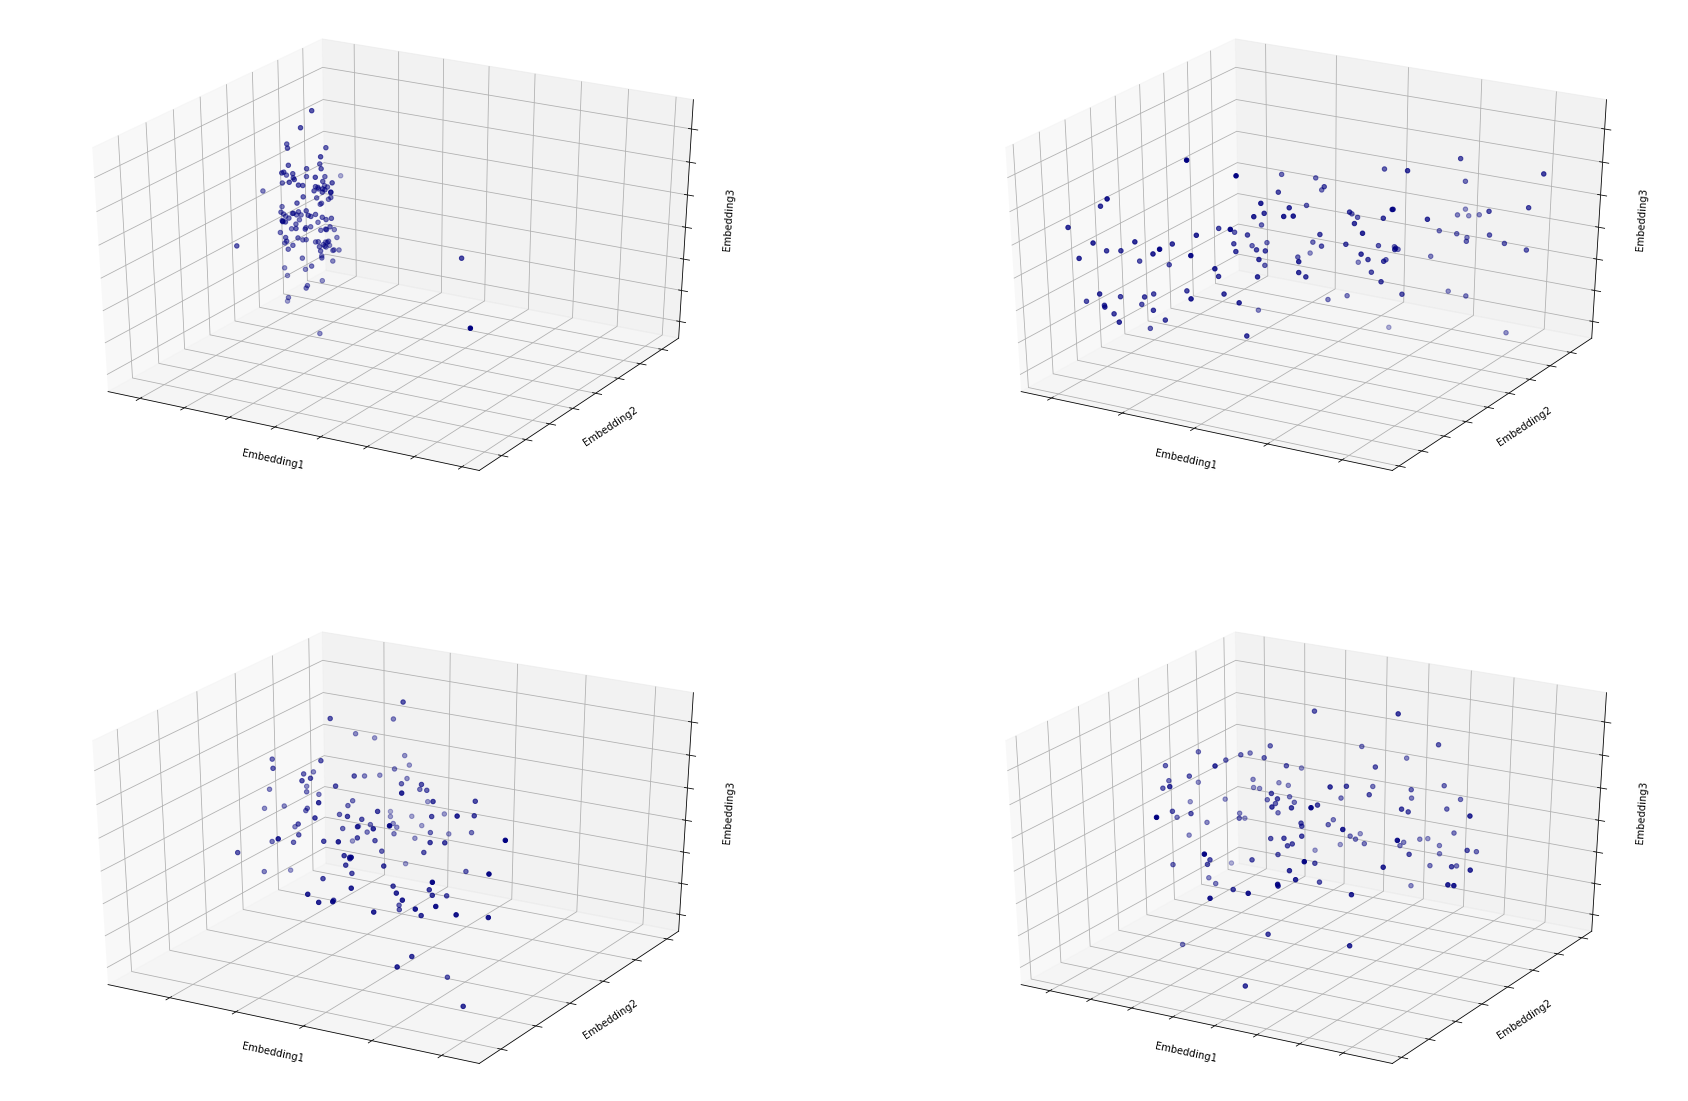

In [20]:
perplexities = [5, 30, 50, 100]


(fig, subplots) = plt.subplots(2, 2, figsize=(30, 20), subplot_kw=dict(projection='3d'))
plt.axis('tight')

for i, perplexity in enumerate(perplexities):
    ax = subplots[int(i/len(subplots))][int(i%len(subplots))]

    tsne = TSNE(n_components=2, init='random', verbose=100,
                         random_state=0, perplexity=perplexity, metric='cityblock')
    
    tsne_data = tsne.fit_transform(X_dummies)
    
    ax.scatter(tsne_data[:, 0], tsne_data[:, 1], target, c='navy')
    
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.zaxis.set_major_formatter(NullFormatter())
    
    ax.set_xlabel('Embedding1')
    ax.set_ylabel('Embedding2')
    ax.set_zlabel('Embedding3')
    
    ax.axis('tight')

[t-SNE] Computing 119 nearest neighbors...
[t-SNE] Indexed 120 samples in 0.000s...
[t-SNE] Computed neighbors for 120 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 120 / 120
[t-SNE] Mean sigma: 6.403426
[t-SNE] Computed conditional probabilities in 0.008s
[t-SNE] Iteration 50: error = 53.4674149, gradient norm = 0.5601137 (50 iterations in 0.091s)
[t-SNE] Iteration 100: error = 53.2949867, gradient norm = 0.5907066 (50 iterations in 0.092s)
[t-SNE] Iteration 150: error = 52.6112289, gradient norm = 0.5640672 (50 iterations in 0.096s)
[t-SNE] Iteration 200: error = 53.9564056, gradient norm = 0.5365508 (50 iterations in 0.086s)
[t-SNE] Iteration 250: error = 52.9557571, gradient norm = 0.4888359 (50 iterations in 0.092s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.955757
[t-SNE] Iteration 300: error = 0.4162234, gradient norm = 0.0084954 (50 iterations in 0.078s)
[t-SNE] Iteration 350: error = 0.2290282, gradient norm = 0.0040124 

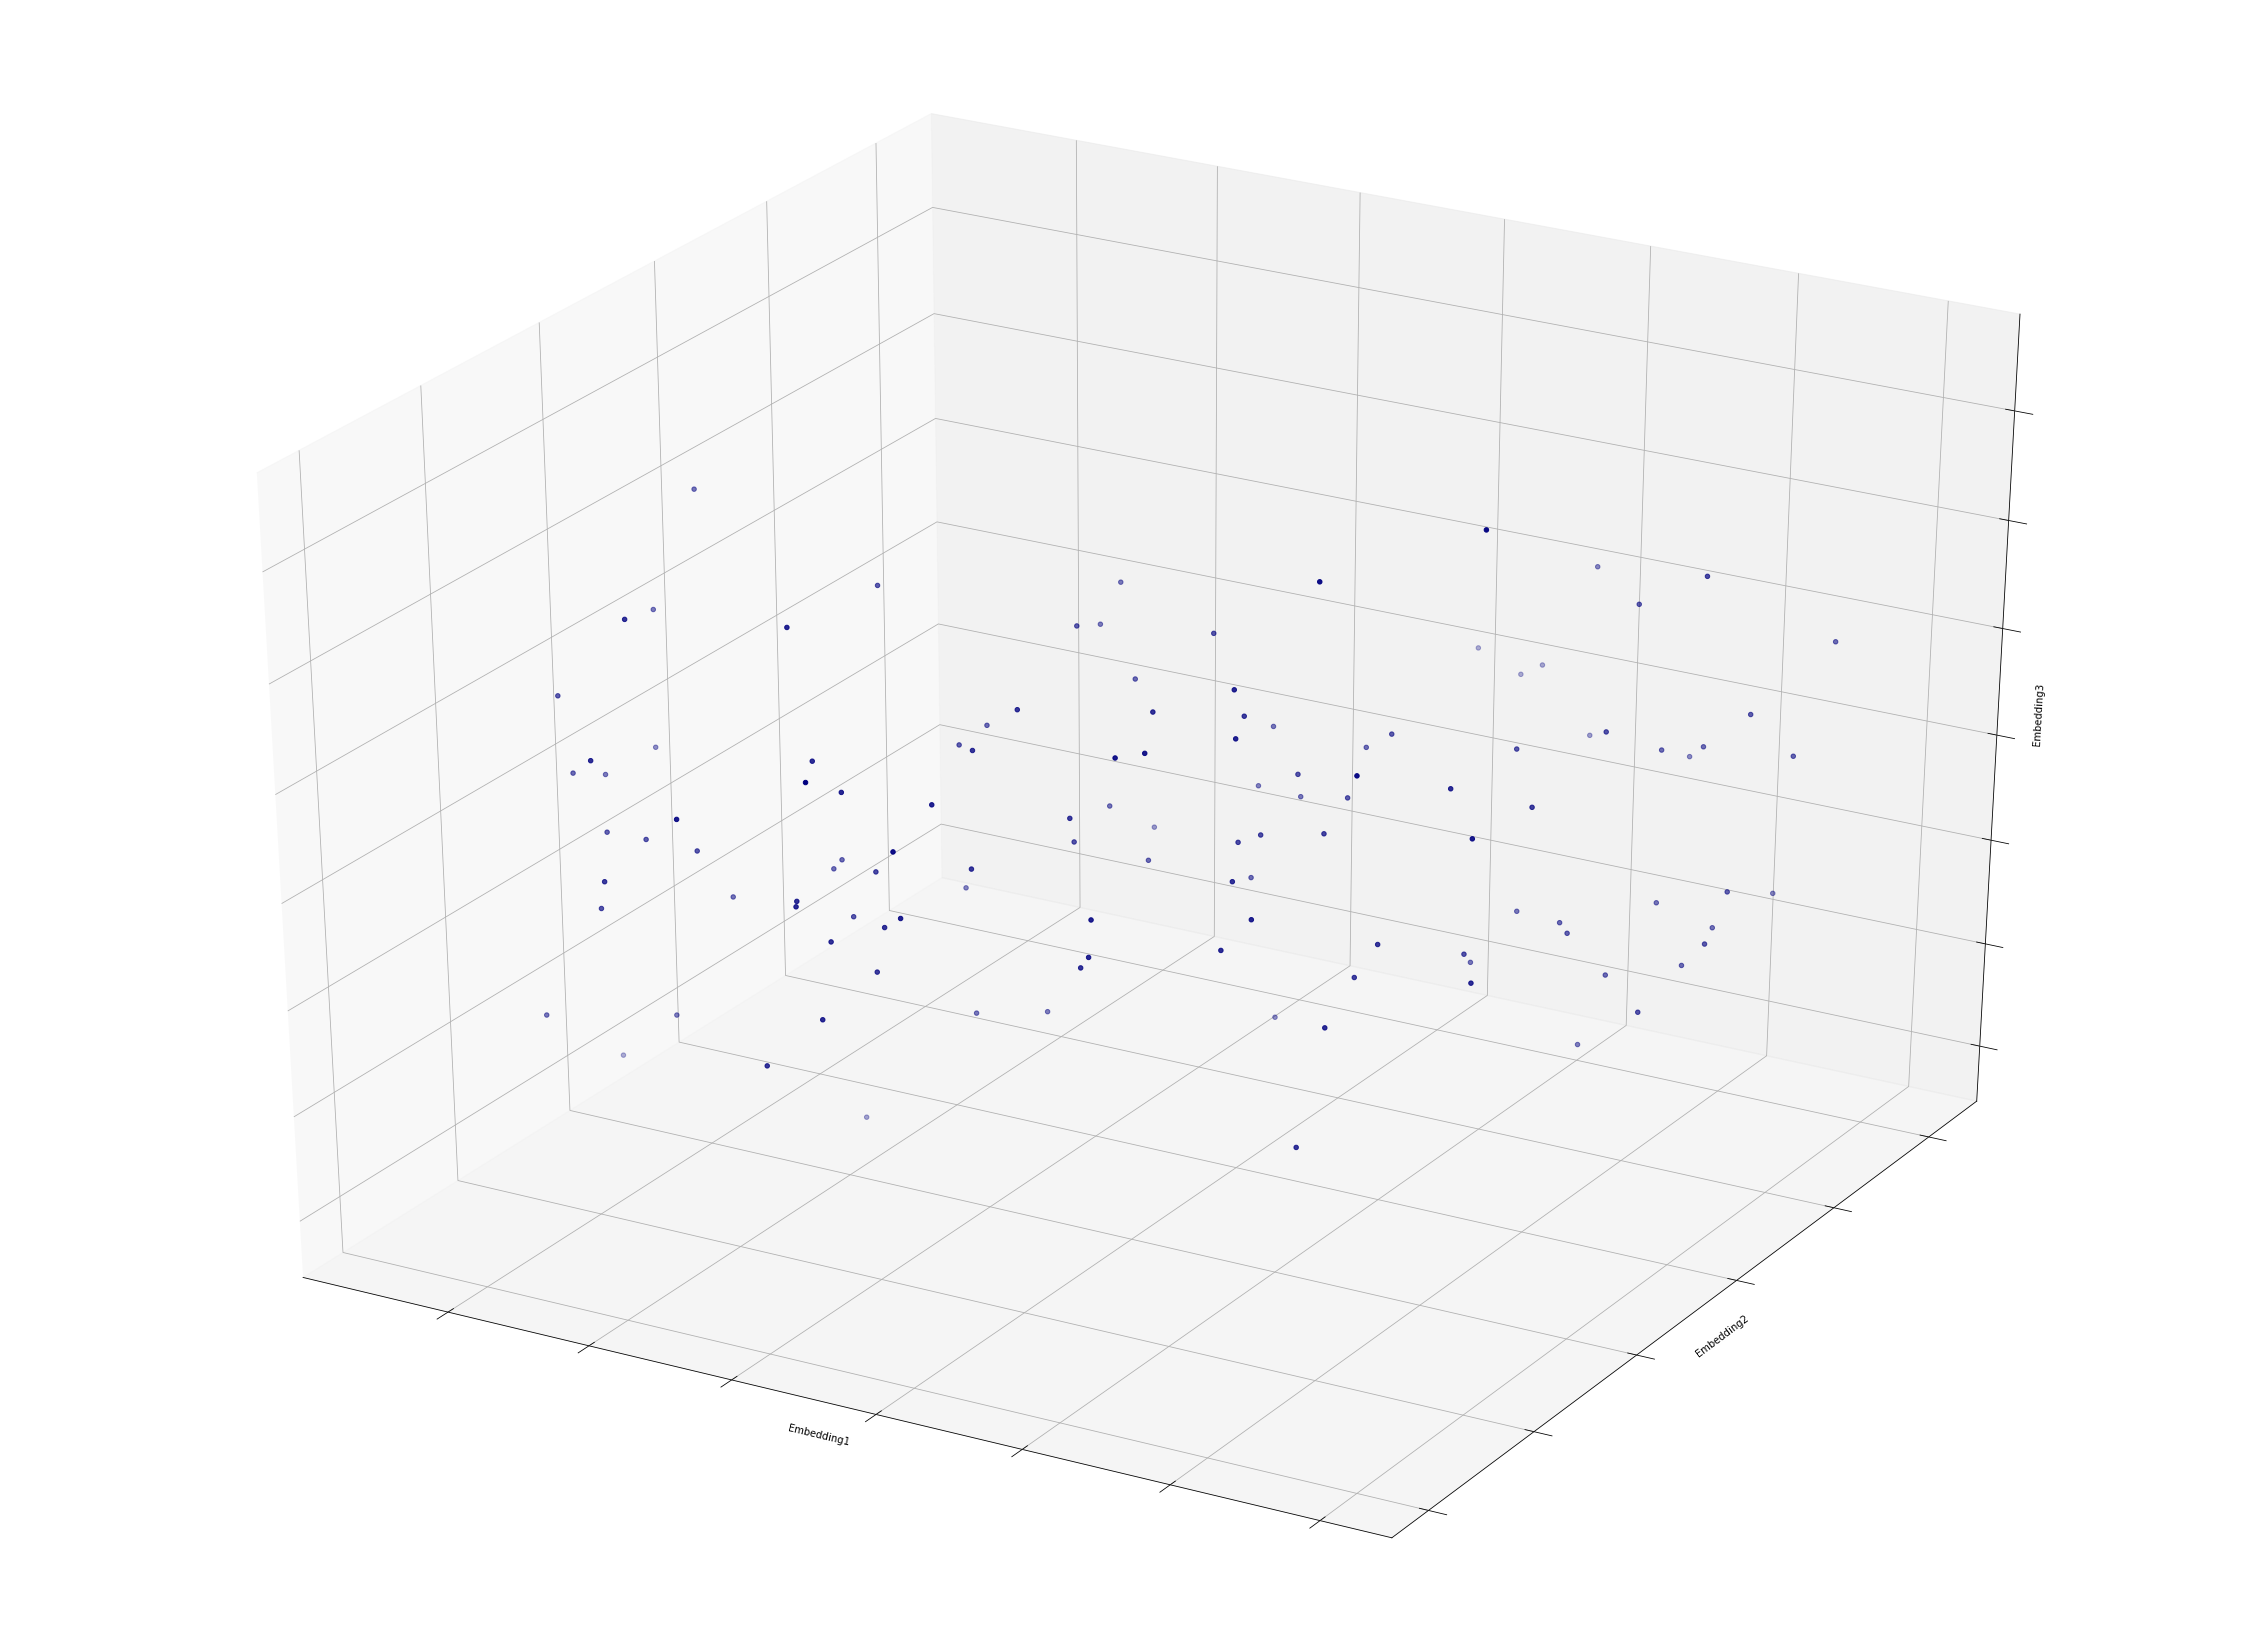

In [21]:
tsne = TSNE(n_components=2, init='random', verbose=100,
                         random_state=0, perplexity=40, metric='cityblock')
    
tsne_data = tsne.fit_transform(X_dummies)



(fig, subplots) = plt.subplots(1, 1, figsize=(40, 30), subplot_kw=dict(projection='3d'))
ax = subplots

ax.scatter(tsne_data[:, 0], tsne_data[:, 1], target, c='navy')

ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.zaxis.set_major_formatter(NullFormatter())

ax.set_xlabel('Embedding1')
ax.set_ylabel('Embedding2')
ax.set_zlabel('Embedding3')

ax.axis('tight')

plt.show()

In [23]:
correlation_data = continuous_data.corr()

In [24]:
correlation_data

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32
y,1.000000,0.092746,-0.038572,-0.156306,0.001832,0.012756,0.147952,0.126008,0.105523,-0.026902,...,0.349120,-0.219829,0.200455,-0.105667,0.064705,-0.050395,0.257992,0.073314,-0.249219,-0.281716
x1,0.092746,1.000000,-0.952226,0.026727,-0.414165,-0.250278,0.030466,0.181525,-0.077293,0.442953,...,-0.185471,-0.045148,0.137255,-0.099344,0.332137,0.034283,0.112132,-0.577537,-0.193405,-0.146965
x2,-0.038572,-0.952226,1.000000,-0.080950,0.390751,0.268492,-0.013959,-0.158532,0.145233,-0.430908,...,0.238817,0.038963,-0.093791,0.039272,-0.357742,-0.006307,-0.099704,0.590626,0.203637,0.145313
x3,-0.156306,0.026727,-0.080950,1.000000,-0.265961,-0.136505,-0.228187,-0.197386,-0.429792,-0.077023,...,0.014116,0.047900,-0.288904,0.398927,0.404271,0.064361,0.016688,-0.104289,0.010217,0.018716
x4,0.001832,-0.414165,0.390751,-0.265961,1.000000,-0.084711,-0.141607,-0.122493,0.070503,-0.178051,...,0.246575,0.111069,0.127447,0.083984,-0.225562,-0.141607,0.016448,0.263984,0.166458,0.123986
x5,0.012756,-0.250278,0.268492,-0.136505,-0.084711,1.000000,-0.072680,-0.062869,0.070837,-0.101211,...,0.031532,-0.052940,-0.038881,-0.116619,-0.142868,0.061499,-0.047836,0.151503,0.057295,0.033594
x6,0.147952,0.030466,-0.013959,-0.228187,-0.141607,-0.072680,1.000000,-0.105095,0.132092,-0.051574,...,-0.218556,-0.091278,-0.232985,0.100494,-0.143100,-0.035226,-0.079966,-0.061778,-0.305836,-0.312299
x7,0.126008,0.181525,-0.158532,-0.197386,-0.122493,-0.062869,-0.105095,1.000000,0.040700,0.138762,...,0.149770,-0.078884,0.146178,-0.229036,0.002150,-0.105095,0.207514,0.134724,-0.098171,-0.079490
x8,0.105523,-0.077293,0.145233,-0.429792,0.070503,0.070837,0.132092,0.040700,1.000000,-0.187528,...,0.105129,0.088368,0.214251,-0.346249,-0.587949,0.343671,0.052815,0.155135,0.073419,0.041188
x9,-0.026902,0.442953,-0.430908,-0.077023,-0.178051,-0.101211,-0.051574,0.138762,-0.187528,1.000000,...,-0.269035,-0.074795,-0.002347,0.068498,0.181440,-0.046292,-0.064655,-0.381438,-0.101389,-0.066287


In [83]:
correlation_data.abs().style.background_gradient(cmap='coolwarm')

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32
y,1,0.0927463,0.0385718,0.156306,0.00183159,0.012756,0.147952,0.126008,0.105523,0.0269024,0.114363,0.0388757,0.182304,0.23512,0.0721602,0.163904,0.0704166,0.0473059,0.139205,0.0330835,0.0129695,0.125147,0.0296386,0.34912,0.219829,0.200455,0.105667,0.064705,0.0503954,0.257992,0.0733135,0.249219,0.281716
x1,0.0927463,1,0.952226,0.0267271,0.414165,0.250278,0.0304656,0.181525,0.0772929,0.442953,0.184982,0.860653,0.18105,0.207729,0.26081,0.00802256,0.0661201,0.692004,0.15587,0.069338,0.0125995,0.261594,0.232037,0.185471,0.0451479,0.137255,0.0993443,0.332137,0.0342825,0.112132,0.577537,0.193405,0.146965
x2,0.0385718,0.952226,1,0.0809505,0.390751,0.268492,0.0139592,0.158532,0.145233,0.430908,0.174423,0.83619,0.212014,0.252976,0.260696,0.0142693,0.0162848,0.64016,0.160653,0.0559129,0.0767818,0.312121,0.228279,0.238817,0.0389627,0.093791,0.0392724,0.357742,0.00630733,0.099704,0.590626,0.203637,0.145313
x3,0.156306,0.0267271,0.0809505,1,0.265961,0.136505,0.228187,0.197386,0.429792,0.0770229,0.200388,0.0262852,0.0163146,0.455746,0.146183,0.672838,0.14125,0.020004,0.266711,0.0526586,0.182349,0.0342585,0.0755786,0.0141157,0.0478998,0.288904,0.398927,0.404271,0.0643605,0.0166875,0.104289,0.0102172,0.0187156
x4,0.00183159,0.414165,0.390751,0.265961,1,0.0847114,0.141607,0.122493,0.0705029,0.178051,0.0715496,0.344038,0.00219346,0.0546188,0.0583856,0.203131,0.155655,0.527959,0.0557614,0.141607,0.0754409,0.315969,0.145688,0.246575,0.111069,0.127447,0.0839843,0.225562,0.141607,0.0164476,0.263984,0.166458,0.123986
x5,0.012756,0.250278,0.268492,0.136505,0.0847114,1,0.0726802,0.0628695,0.0708371,0.101211,0.0601924,0.0812361,0.206487,0.115033,0.115033,0.104257,0.00843559,0.141447,0.0695048,0.0614986,0.0387202,0.0492424,0.0665632,0.031532,0.0529397,0.0388814,0.116619,0.142868,0.0614986,0.0478365,0.151503,0.0572947,0.0335935
x6,0.147952,0.0304656,0.0139592,0.228187,0.141607,0.0726802,1,0.105095,0.132092,0.0515741,0.0590126,0.0792896,0.00417384,0.0655066,0.0655066,0.174281,0.118234,0.164679,0.151937,0.568656,0.0647263,0.33687,0.0821021,0.218556,0.0912783,0.232985,0.100494,0.1431,0.0352265,0.0799656,0.0617781,0.305836,0.312299
x7,0.126008,0.181525,0.158532,0.197386,0.122493,0.0628695,0.105095,1,0.0406999,0.138762,0.0352803,0.0694123,0.0228883,0.166337,0.0475248,0.0753778,0.0609892,0.127142,0.100504,0.105095,0.0559893,0.00812437,0.0803643,0.14977,0.0788838,0.146178,0.229036,0.0021504,0.105095,0.207514,0.134724,0.0981712,0.0794899
x8,0.105523,0.0772929,0.145233,0.429792,0.0705029,0.0708371,0.132092,0.0406999,1,0.187528,0.0547358,0.142541,0.0179757,0.438677,0.0387136,0.187917,0.224669,0.00224007,0.348496,0.00256069,0.150347,0.19706,0.0947358,0.105129,0.0883683,0.214251,0.346249,0.587949,0.343671,0.0528151,0.155135,0.0734187,0.0411877
x9,0.0269024,0.442953,0.430908,0.0770229,0.178051,0.101211,0.0515741,0.138762,0.187528,1,0.0458739,0.470924,0.207642,0.0191919,0.0463624,0.03557,0.231901,0.225991,0.155961,0.033967,0.0127023,0.299604,0.0970463,0.269035,0.0747953,0.00234695,0.0684976,0.18144,0.046292,0.0646547,0.381438,0.101389,0.0662868


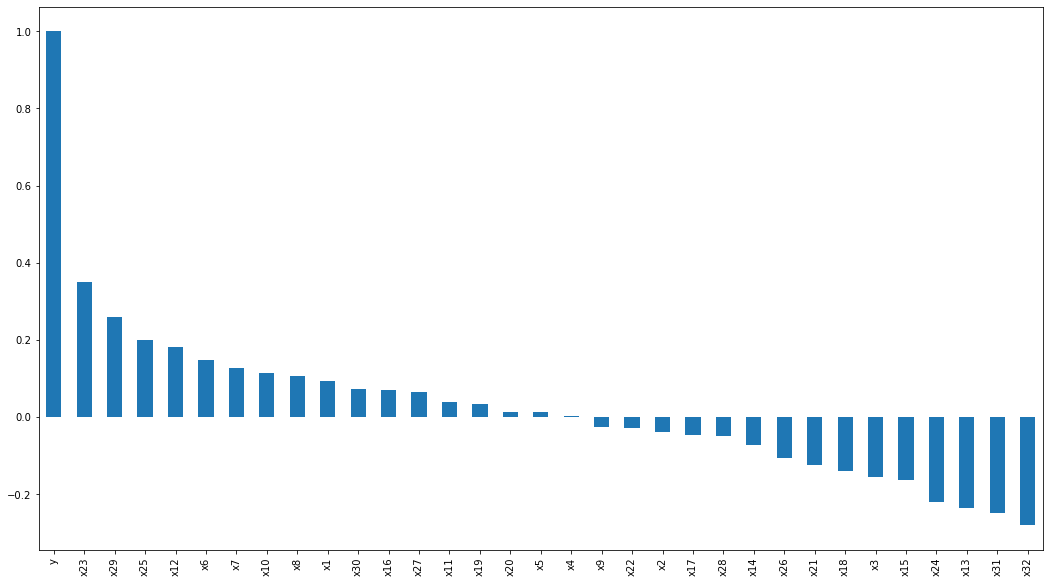

In [25]:
plt.figure(figsize=(18,10))
correlation_data['y'].sort_values(ascending = False).plot(kind='bar')

In [27]:
correlation_dummy_data = data_with_dummies.corr()

In [77]:
correlation_dummy_data.abs().style.background_gradient(cmap='coolwarm')

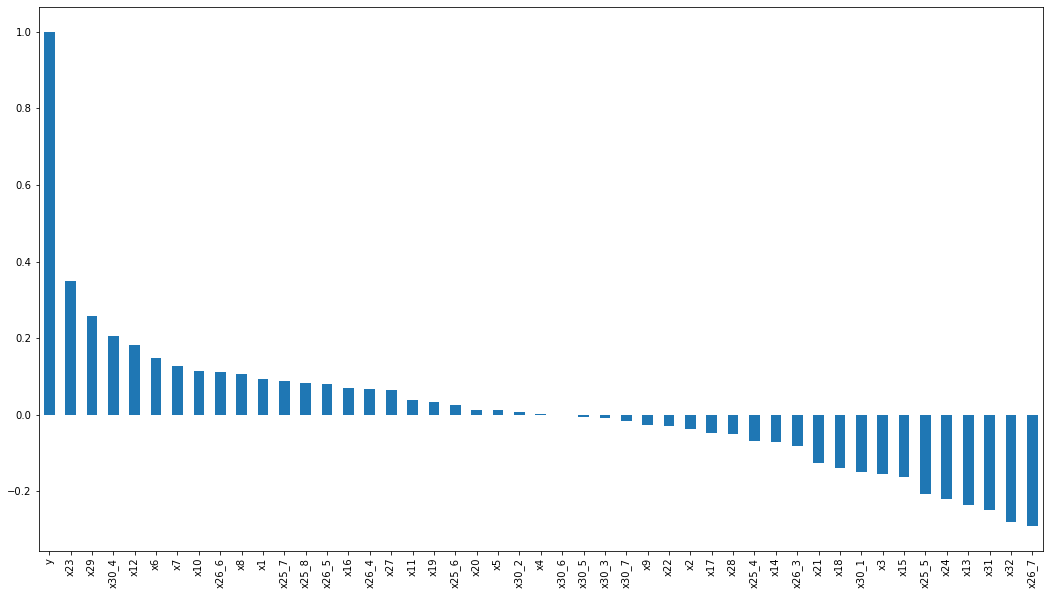

In [75]:
plt.figure(figsize=(18,10))
correlation_dummy_data['y'].sort_values(ascending = False).plot(kind='bar')

In [28]:
num_variables_original = ['y','x1','x2','x8','x9','x10','x11','x12','x21','x22','x23','x24','x25','x26','x27','x31','x32']
num_variables_dummies = ['y', 'x1', 'x2', 'x8', 'x9', 'x10', 'x11', 'x12', 'x21', 'x22', 'x23', 'x24', 'x27', 'x31', 'x32']

In [29]:
num_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])

col_transformer_original = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_variables_original),
])

col_transformer_dummies = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_variables_dummies),
])

In [30]:
continuous_data[num_variables_original] = col_transformer_original.fit_transform(continuous_data)
data_with_dummies[num_variables_dummies] = col_transformer_dummies.fit_transform(data_with_dummies)

In [31]:
data_with_dummies.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x26_5,x26_6,x26_7,x30_1,x30_2,x30_3,x30_4,x30_5,x30_6,x30_7
0,0.408751,0.219704,0.675340,1,0,0,0,0,0.572264,0.000000,...,0,1,0,0,0,0,0,0,0,1
1,0.934402,0.673894,0.219988,0,1,0,0,0,0.647440,0.600000,...,0,1,0,0,0,0,1,0,0,0
2,0.317747,0.000000,0.753400,0,0,1,0,0,0.571626,0.000000,...,0,0,0,0,0,0,0,0,0,1
3,0.000000,0.798447,0.115908,1,0,0,0,0,0.049226,0.688889,...,0,0,1,0,0,1,0,0,0,0
4,0.488119,0.704965,0.222945,0,0,0,0,1,0.447667,0.688889,...,0,0,0,0,0,0,0,1,0,0


In [37]:
alphas = [1e-2, 1e-1, 1, 1e1, 1e2]
ratios = [.1, .5, .7, .9, .95, .99, 1]

lasso_original = LassoCV(alphas=alphas, verbose=100, n_jobs=-1, cv=5)
lasso_dummies = LassoCV(alphas=alphas, verbose=100, n_jobs=-1, cv=5)

elasticnet_original = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=5, verbose=100, n_jobs=-1)
elasticnet_dummies = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=5, verbose=100, n_jobs=-1)

bayes_original = BayesianRidge(verbose=True)
bayes_dummies = BayesianRidge(verbose=True)

In [38]:
X_orig_train, X_orig_val, y_orig_train, y_orig_val = train_test_split(continuous_data.drop(['y'], axis=1), continuous_data['y'],
                                                                     test_size=0.25, random_state=0)

In [39]:
X_dum_train, X_dum_val, y_dum_train, y_dum_val = train_test_split(data_with_dummies.drop(['y'], axis=1), data_with_dummies['y'],
                                                                     test_size=0.25, random_state=0)

In [40]:
lasso_original.fit(X_orig_train, y_orig_train)
elasticnet_original.fit(X_orig_train, y_orig_train)
bayes_original.fit(X_orig_train, y_orig_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
(array([ 0., -0., -0., -0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,
       -0., -0.,  0., -0., -0., -0., -0., -0., -0.,  0., -0.,  0., -0.,
       -0., -0.,  0.,  0., -0., -0.]), 0.0, 0.00021601261914350263, 1)
(array([ 0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0., -0.,
        0., -0.,  0.,  0., -0., -0., -0., -0., -0.,  0., -0.,  0., -0.,
       -0., -0.,  0.,  0., -0., -0.]), 0.0, 0.0002345770154473887, 1)(array([ 0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,
       -0., -0.,  0., -0., -0.,  0., -0., -0.,  0.,  0., -0.,  0., -0.,
        0., -0.,  0.,  0., -0., -0.]), 0.0, 0.00017466044897480467, 1)

(array([ 0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,
       -0., -0.,  0., -0., -0.,  0., -0., -0.,  0.,  0., -0.,  0., -0.,
        0., -0.,  0.,  0., -0., -0.]), 0.0, 0.00017466044897480467, 1)(array([ 0., -0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,

       -0., -0.,  0.,  0., -0., -0.]), 0.0, 0.0002345770154473887, 1)(array([ 0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.01421899, -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.0652233 , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.01765633, -0.        ,
       -0.        , -0.00803602]), 5.156437121733859e-08, 0.00021714721526196117, 6)(array([ 0.        ,  0.        , -0.00616395,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.03376235, -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.04804287, -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.    

Convergence after  16  iterations


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=True)

In [42]:
lasso_dummies.fit(X_dum_train, y_dum_train)
elasticnet_dummies.fit(X_dum_train, y_dum_train)
bayes_dummies.fit(X_dum_train, y_dum_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
(array([ 0., -0., -0., -0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,
       -0., -0.,  0., -0., -0., -0., -0., -0., -0.,  0., -0., -0., -0.,
        0., -0., -0., -0., -0., -0.,  0.,  0., -0.,  0.,  0., -0., -0.,
       -0., -0., -0.,  0.,  0.,  0.,  0.]), 0.0, 0.00021601261914350263, 1)
(array([ 0., -0., -0., -0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,
       -0., -0.,  0., -0., -0., -0., -0., -0., -0.,  0., -0., -0., -0.,
        0., -0., -0., -0., -0., -0.,  0.,  0., -0.,  0.,  0., -0., -0.,
       -0., -0., -0.,  0.,  0.,  0.,  0.]), 0.0, 0.00021601261914350263, 1)(array([ 0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0., -0.,
        0., -0.,  0.,  0., -0., -0., -0., -0., -0.,  0., -0., -0., -0.,
        0., -0., -0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,
       -0., -0., -0.,  0., -0., -0.,  0.]), 0.0, 0.0002345770154473887, 1)

(array([ 0., -0., -0.,  0.,  0.,  0.,  0.

(array([ 0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,
       -0., -0.,  0., -0., -0.,  0., -0., -0.,  0.,  0., -0.,  0., -0.,
        0., -0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,
       -0., -0.,  0.,  0.,  0.,  0., -0.]), 0.0, 0.00017466044897480467, 1)
(array([ 0., -0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0., -0.,
       -0., -0.,  0.,  0., -0., -0.,  0., -0., -0.,  0., -0.,  0., -0.,
        0., -0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,
       -0., -0., -0.,  0., -0., -0.,  0.]), 0.0, 0.00023328850346531713, 1)(array([ 0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,
       -0., -0.,  0., -0., -0.,  0., -0., -0.,  0.,  0., -0.,  0., -0.,
        0., -0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,
       -0., -0.,  0.,  0.,  0.,  0., -0.]), 0.0, 0.00017466044897480467, 1)
(array([ 0., -0., -0., -0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,
       -0., -0.,  0., -0., -0., -0., -0., -0., -0

(array([ 0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,
       -0., -0.,  0., -0., -0.,  0., -0., -0.,  0.,  0., -0.,  0., -0.,
        0., -0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,
       -0., -0.,  0.,  0.,  0.,  0., -0.]), 0.0, 0.00017466044897480467, 1)(array([ 0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,
       -0., -0.,  0., -0., -0.,  0., -0., -0.,  0.,  0., -0.,  0., -0.,
        0., -0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,
       -0., -0.,  0.,  0.,  0.,  0., -0.]), 0.0, 0.00017466044897480467, 1)(array([ 0., -0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0., -0.,
       -0., -0.,  0.,  0., -0., -0.,  0., -0., -0.,  0., -0.,  0., -0.,
        0., -0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,
       -0., -0., -0.,  0., -0., -0.,  0.]), 0.0, 0.00023328850346531713, 1)

(array([ 0., -0., -0., -0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,
       -0., -0.,  0., -0., -0., -0., -0., -0., -0

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=True)

In [53]:
y_orig_train_pred = lasso_original.predict(X_orig_train)
y_dum_train_pred = lasso_dummies.predict(X_dum_train)

In [54]:
print("Explained variance by Lasso on original data: " + str(explained_variance_score(y_orig_train, y_orig_train_pred)))
print("Mean Squared error by Lasso on original data: " + str(mean_squared_error(y_orig_train, y_orig_train_pred)))
print("R2 of data by Lasso on original data: " + str(r2_score(y_orig_train, y_orig_train_pred)))

Explained variance by Lasso on original data: 0.13300927215033786
Mean Squared error by Lasso on original data: 0.025959510914189687
R2 of data by Lasso on original data: 0.13300927215033798


In [56]:
print("Explained variance by Lasso on dummy data: " + str(explained_variance_score(y_dum_train, y_dum_train_pred)))
print("Mean Squared error by Lasso on dummy data: " + str(mean_squared_error(y_dum_train, y_dum_train_pred)))
print("R2 of data by Lasso on dummy data: " + str(r2_score(y_dum_train, y_dum_train_pred)))

Explained variance by Lasso on dummy data: 0.17402503784917744
Mean Squared error by Lasso on dummy data: 0.024731413331238947
R2 of data by Lasso on dummy data: 0.17402503784917744


In [57]:
y_orig_train_pred = elasticnet_original.predict(X_orig_train)
y_dum_train_pred = elasticnet_dummies.predict(X_dum_train)

In [58]:
print("Explained variance by ElasticNet on original data: " + str(explained_variance_score(y_orig_train, y_orig_train_pred)))
print("Mean Squared error by ElasticNet on original data: " + str(mean_squared_error(y_orig_train, y_orig_train_pred)))
print("R2 of data by ElasticNet on original data: " + str(r2_score(y_orig_train, y_orig_train_pred)))

Explained variance by ElasticNet on original data: 0.17488074503958584
Mean Squared error by ElasticNet on original data: 0.024705791672972946
R2 of data by ElasticNet on original data: 0.17488074503958584


In [59]:
print("Explained variance by ElasticNet on dummy data: " + str(explained_variance_score(y_dum_train, y_dum_train_pred)))
print("Mean Squared error by ElasticNet on dummy data: " + str(mean_squared_error(y_dum_train, y_dum_train_pred)))
print("R2 of data by ELasticNet on dummy data: " + str(r2_score(y_dum_train, y_dum_train_pred)))

Explained variance by ElasticNet on dummy data: 0.1276075742145817
Mean Squared error by ElasticNet on dummy data: 0.026121249018201724
R2 of data by ELasticNet on dummy data: 0.1276075742145817


In [60]:
y_orig_train_pred = bayes_original.predict(X_orig_train)
y_dum_train_pred = bayes_dummies.predict(X_dum_train)

In [61]:
print("Explained variance by BayesianRidge on original data: " + str(explained_variance_score(y_orig_train, y_orig_train_pred)))
print("Mean Squared error by BayesianRidge on original data: " + str(mean_squared_error(y_orig_train, y_orig_train_pred)))
print("R2 of data by BayesianRidge on original data: " + str(r2_score(y_orig_train, y_orig_train_pred)))

Explained variance by BayesianRidge on original data: 0.21282959267760448
Mean Squared error by BayesianRidge on original data: 0.023569524014282493
R2 of data by BayesianRidge on original data: 0.21282959267760448


In [62]:
print("Explained variance by BayesianRidge on dummy data: " + str(explained_variance_score(y_dum_train, y_dum_train_pred)))
print("Mean Squared error by BayesianRidge on dummy data: " + str(mean_squared_error(y_dum_train, y_dum_train_pred)))
print("R2 of data by BayesianRidge on dummy data: " + str(r2_score(y_dum_train, y_dum_train_pred)))

Explained variance by BayesianRidge on dummy data: 0.25781602829649763
Mean Squared error by BayesianRidge on dummy data: 0.022222536291200808
R2 of data by BayesianRidge on dummy data: 0.25781602829649763


In [69]:
bayes_dummies.coef_

array([ 1.30008002e-02, -3.73797722e-03, -1.22296147e-02, -4.62885971e-03,
        3.58001539e-03,  1.83080805e-02,  1.23466263e-02,  3.31799096e-03,
       -7.51523736e-03,  9.34607857e-03,  4.84624414e-03,  8.81495762e-03,
       -3.36672047e-02, -1.35183063e-02, -3.58398769e-03,  9.88263284e-03,
       -7.54065051e-05, -1.25066992e-02, -7.75983613e-03,  2.99145009e-03,
       -1.21403008e-02, -5.17370720e-03,  3.47857307e-02, -1.40368717e-02,
        8.89973801e-03, -7.48801273e-03,  2.31334855e-02, -2.17842357e-02,
       -2.61925193e-02, -4.13633387e-03, -1.71624249e-02, -5.70156425e-04,
        8.13438379e-03,  1.37345314e-02, -1.40715778e-02,  1.72407995e-02,
        1.20629992e-02,  1.01714404e-02, -2.54036613e-02, -7.55766394e-03,
       -1.38588280e-03, -1.17102063e-02,  3.34613790e-02, -2.70657763e-03,
       -1.83936374e-03, -8.26168464e-03])

In [72]:
bayes_dummies.coef_ >= 1e-2

array([ True, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False,  True, False,  True,
        True,  True, False, False, False, False,  True, False, False,
       False])

In [73]:
lasso_dummies.coef_ != 0

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False])

In [71]:
elasticnet_dummies.coef_

array([ 0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.02816701, -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.04079228, -0.        ,  0.        ,
       -0.        ,  0.000635  , -0.        , -0.01121347, -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.02443747, -0.        ,
       -0.        , -0.        ,  0.01987177, -0.        , -0.        ,
       -0.        ])

In [74]:
elasticnet_dummies.coef_ != 0

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False])

In [78]:
rfecv_lasso_original = RFECV(estimator=lasso_original, n_jobs=-1, cv=5, verbose=100, scoring='neg_mean_squared_error')
rfecv_lasso_dummy = RFECV(estimator=lasso_dummies, n_jobs=-1, cv=5, verbose=100, scoring='neg_mean_squared_error')

In [79]:
rfecv_lasso_original.fit(X_orig_train, y_orig_train)

Fitting estimator with 32 features.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
(array([ 0., -0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,
       -0., -0.,  0., -0., -0., -0., -0., -0., -0.,  0., -0.,  0., -0.,
        0., -0.,  0.,  0., -0., -0.]), 0.0, 0.00021714721526196117, 1)(array([ 0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,
       -0., -0.,  0., -0., -0.,  0., -0., -0.,  0.,  0., -0.,  0., -0.,
        0., -0.,  0.,  0., -0., -0.]), 0.0, 0.00017466044897480467, 1)

(array([ 0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0., -0.,
        0., -0.,  0.,  0., -0., -0., -0., -0., -0.,  0., -0.,  0., -0.,
       -0., -0.,  0.,  0., -0., -0.]), 0.0, 0.0002345770154473887, 1)
(array([ 0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,
       -0., -0.,  0., -0., -0.,  0., -0., -0.,  0.,  0., -0.,  0., -0.,
        0., -0.,  0.,  0., -0., -0.]), 0.0, 0.00017466044897480467, 1)(array([ 0.,  0., -0.

Fitting estimator with 30 features.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
(array([-0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,
        0., -0., -0.,  0., -0., -0.,  0.,  0., -0.,  0., -0.,  0., -0.,
        0.,  0., -0., -0.]), 0.0, 0.00017466044897480467, 1)
(array([-0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0., -0.,  0., -0.,
        0.,  0., -0., -0., -0., -0., -0.,  0., -0.,  0., -0., -0., -0.,
        0.,  0., -0., -0.]), 0.0, 0.0002345770154473887, 1)(array([-0., -0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0., -0., -0.,
        0., -0., -0., -0., -0., -0., -0.,  0., -0.,  0., -0., -0., -0.,
        0.,  0., -0., -0.]), 0.0, 0.00021601261914350263, 1)(array([-0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,
        0., -0., -0.,  0., -0., -0.,  0.,  0., -0.,  0., -0.,  0., -0.,
        0.,  0., -0., -0.]), 0.0, 0.00017466044897480467, 1)


(array([-0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0

Fitting estimator with 28 features.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
(array([ 0.,  0.,  0.,  0., -0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0.,
       -0., -0., -0., -0., -0.,  0., -0.,  0., -0., -0., -0.,  0.,  0.,
       -0., -0.]), 0.0, 0.0002345770154473887, 1)(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0., -0.,
       -0.,  0., -0., -0.,  0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0.,
       -0., -0.]), 0.0, 0.00017466044897480467, 1)(array([ 0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0., -0., -0.,  0., -0.,
       -0., -0., -0., -0., -0.,  0., -0.,  0., -0., -0., -0.,  0.,  0.,
       -0., -0.]), 0.0, 0.00021601261914350263, 1)


(array([ 0.,  0.,  0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0.,  0.,
       -0., -0.,  0., -0., -0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0.,
       -0., -0.]), 0.0, 0.00023328850346531713, 1)(array([ 0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0., -0., -0.,  0., -0.,
       -0., -0., -0., -0., -

Fitting estimator with 26 features.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
(array([ 0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0., -0., -0.,  0.,
       -0., -0.,  0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0., -0., -0.]), 0.0, 0.00017466044897480467, 1)(array([ 0.,  0., -0., -0.,  0.,  0., -0., -0., -0.,  0., -0., -0., -0.,
       -0., -0., -0.,  0., -0.,  0., -0., -0., -0.,  0.,  0., -0., -0.]), 0.0, 0.00021601261914350263, 1)(array([ 0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0.,  0., -0., -0.,
        0., -0., -0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0., -0., -0.]), 0.0, 0.00023328850346531713, 1)


(array([ 0.,  0., -0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0., -0., -0.,
       -0., -0., -0.,  0., -0.,  0., -0., -0., -0.,  0.,  0., -0., -0.]), 0.0, 0.0002345770154473887, 1)(array([ 0.,  0., -0., -0.,  0.,  0., -0., -0., -0.,  0., -0., -0., -0.,
       -0., -0., -0.,  0., -0.,  0., -0., -0., -0.,  0.,  0., -0., -0.]), 0.0, 0.000216012619143

Fitting estimator with 24 features.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
(array([-0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0., -0., -0., -0., -0.,
       -0.,  0., -0.,  0., -0., -0., -0.,  0.,  0., -0., -0.]), 0.0, 0.0002345770154473887, 1)(array([-0., -0.,  0.,  0., -0., -0., -0.,  0., -0., -0., -0., -0., -0.,
       -0.,  0., -0.,  0., -0., -0., -0.,  0.,  0., -0., -0.]), 0.0, 0.00021601261914350263, 1)
(array([-0.,  0., -0.,  0., -0., -0., -0.,  0.,  0., -0., -0.,  0., -0.,
       -0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0., -0., -0.]), 0.0, 0.00023328850346531713, 1)

(array([-0.,  0.,  0.,  0., -0., -0., -0.,  0., -0., -0., -0., -0., -0.,
       -0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0., -0., -0.]), 0.0, 0.00021714721526196117, 1)(array([-0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0., -0., -0., -0., -0.,
       -0.,  0., -0.,  0., -0., -0., -0.,  0.,  0., -0., -0.]), 0.0, 0.0002345770154473887, 1)

(array([ 0.,  0.,  0.,  0., -0., -0., -0

Fitting estimator with 22 features.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
(array([ 0.,  0., -0., -0., -0.,  0., -0., -0.,  0., -0., -0.,  0.,  0.,
       -0.,  0., -0.,  0., -0.,  0.,  0., -0., -0.]), 0.0, 0.00017466044897480467, 1)
(array([-0.,  0., -0., -0., -0.,  0.,  0., -0., -0.,  0., -0., -0.,  0.,
       -0.,  0., -0.,  0., -0.,  0.,  0., -0., -0.]), 0.0, 0.00023328850346531713, 1)(array([ 0.,  0., -0., -0., -0.,  0., -0., -0.,  0., -0., -0.,  0.,  0.,
       -0.,  0., -0.,  0., -0.,  0.,  0., -0., -0.]), 0.0, 0.00017466044897480467, 1)

(array([ 0.,  0., -0., -0., -0.,  0., -0., -0., -0., -0., -0., -0.,  0.,
       -0.,  0., -0.,  0., -0.,  0.,  0., -0., -0.]), 0.0, 0.00021714721526196117, 1)(array([ 0.,  0., -0., -0., -0.,  0., -0., -0.,  0., -0., -0.,  0.,  0.,
       -0.,  0., -0.,  0., -0.,  0.,  0., -0., -0.]), 0.0, 0.00017466044897480467, 1)

(array([-0.,  0., -0.,  0., -0.,  0.,  0., -0., -0., -0., -0., -0.,  0.,
       -0.,  0.

Fitting estimator with 20 features.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
(array([-0., -0., -0.,  0.,  0., -0., -0.,  0., -0., -0.,  0., -0.,  0.,
       -0.,  0., -0.,  0.,  0., -0., -0.]), 0.0, 0.00023328850346531713, 1)
(array([-0., -0., -0.,  0.,  0., -0., -0.,  0., -0., -0.,  0., -0.,  0.,
       -0.,  0., -0.,  0.,  0., -0., -0.]), 0.0, 0.00023328850346531713, 1)
(array([-0., -0., -0.,  0.,  0., -0., -0.,  0., -0., -0.,  0., -0.,  0.,
       -0.,  0., -0.,  0.,  0., -0., -0.]), 0.0, 0.00023328850346531713, 1)
(array([-0., -0., -0.,  0.,  0., -0., -0.,  0., -0., -0.,  0., -0.,  0.,
       -0.,  0., -0.,  0.,  0., -0., -0.]), 0.0, 0.00023328850346531713, 1)
(array([-0., -0., -0.,  0., -0., -0., -0., -0., -0., -0.,  0., -0.,  0.,
       -0.,  0., -0.,  0.,  0., -0., -0.]), 0.0, 0.00021714721526196117, 1)
(array([-0., -0., -0.,  0., -0., -0., -0., -0., -0., -0.,  0., -0.,  0.,
       -0.,  0., -0.,  0.,  0., -0., -0.]), 0.0, 0.00021714721526

Fitting estimator with 18 features.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
(array([-0., -0., -0.,  0., -0., -0.,  0., -0.,  0., -0.,  0., -0.,  0.,
       -0.,  0.,  0., -0., -0.]), 0.0, 0.00017466044897480467, 1)
(array([-0., -0., -0.,  0., -0., -0.,  0., -0.,  0., -0.,  0., -0.,  0.,
       -0.,  0.,  0., -0., -0.]), 0.0, 0.00017466044897480467, 1)
(array([-0.,  0., -0.,  0.,  0., -0., -0., -0.,  0., -0.,  0., -0., -0.,
       -0.,  0.,  0., -0., -0.]), 0.0, 0.0002345770154473887, 1)
(array([-0.,  0., -0.,  0.,  0., -0., -0., -0.,  0., -0.,  0., -0., -0.,
       -0.,  0.,  0., -0., -0.]), 0.0, 0.0002345770154473887, 1)
(array([-0.,  0., -0.,  0.,  0., -0., -0., -0.,  0., -0.,  0., -0., -0.,
       -0.,  0.,  0., -0., -0.]), 0.0, 0.0002345770154473887, 1)
(array([-0., -0., -0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0., -0.,  0.,
       -0.,  0.,  0., -0., -0.]), 0.0, 0.00023328850346531713, 1)
(array([-0., -0., -0.,  0.,  0., -0., -0.,  0.,  0.,

Fitting estimator with 16 features.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
(array([-0., -0.,  0., -0., -0., -0., -0.,  0.,  0., -0., -0., -0.,  0.,
        0., -0., -0.]), 0.0, 0.00021601261914350263, 1)
(array([-0., -0.,  0., -0., -0., -0., -0.,  0.,  0., -0., -0., -0.,  0.,
        0., -0., -0.]), 0.0, 0.00021601261914350263, 1)
(array([-0., -0.,  0., -0., -0., -0., -0.,  0.,  0., -0., -0., -0.,  0.,
        0., -0., -0.]), 0.0, 0.00021601261914350263, 1)(array([-0., -0.,  0.,  0., -0., -0., -0.,  0.,  0., -0., -0., -0.,  0.,
        0., -0., -0.]), 0.0, 0.0002345770154473887, 1)
(array([-0., -0.,  0.,  0., -0., -0., -0.,  0.,  0., -0., -0., -0.,  0.,
        0., -0., -0.]), 0.0, 0.0002345770154473887, 1)

(array([-0., -0.,  0., -0., -0., -0., -0.,  0.,  0., -0., -0., -0.,  0.,
        0., -0., -0.]), 0.0, 0.00021601261914350263, 1)
(array([-0., -0.,  0.,  0., -0., -0., -0.,  0.,  0., -0., -0., -0.,  0.,
        0., -0., -0.]), 0.0, 0.0002345

Fitting estimator with 14 features.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
(array([-0., -0., -0., -0., -0.,  0.,  0., -0., -0., -0.,  0.,  0., -0.,
       -0.]), 0.0, 0.00021601261914350263, 1)
(array([-0., -0., -0., -0., -0.,  0.,  0., -0., -0., -0.,  0.,  0., -0.,
       -0.]), 0.0, 0.00021601261914350263, 1)
(array([-0., -0., -0., -0., -0.,  0.,  0., -0., -0., -0.,  0.,  0., -0.,
       -0.]), 0.0, 0.00021601261914350263, 1)
(array([-0., -0., -0.,  0., -0.,  0.,  0., -0.,  0., -0.,  0.,  0., -0.,
       -0.]), 0.0, 0.00017466044897480467, 1)
(array([-0., -0., -0.,  0., -0.,  0.,  0., -0.,  0., -0.,  0.,  0., -0.,
       -0.]), 0.0, 0.00017466044897480467, 1)
(array([-0., -0., -0., -0., -0.,  0.,  0., -0., -0., -0.,  0.,  0., -0.,
       -0.]), 0.0, 0.00021601261914350263, 1)
(array([-0., -0., -0., -0., -0.,  0.,  0., -0.,  0., -0.,  0.,  0., -0.,
       -0.]), 0.0, 0.00021714721526196117, 1)
(array([-0., -0., -0., -0., -0.,  0.,  0., -0.,  0

Fitting estimator with 10 features.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
(array([-0.,  0.,  0., -0.,  0., -0.,  0.,  0., -0., -0.]), 0.0, 0.00017466044897480467, 1)
(array([-0.,  0.,  0., -0.,  0., -0.,  0.,  0., -0., -0.]), 0.0, 0.00017466044897480467, 1)
(array([-0.,  0.,  0., -0.,  0., -0.,  0.,  0., -0., -0.]), 0.0, 0.00017466044897480467, 1)
(array([-0.,  0.,  0., -0.,  0., -0.,  0.,  0., -0., -0.]), 0.0, 0.00017466044897480467, 1)
(array([-0.03854025,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.00586953,  0.00228641, -0.        , -0.00831116]), 3.0224334057749047e-07, 0.00017466044897480467, 8)
(array([-0.,  0.,  0., -0.,  0., -0.,  0.,  0., -0., -0.]), 0.0, 0.00023328850346531713, 1)(array([-0.,  0.,  0., -0., -0., -0.,  0.,  0., -0., -0.]), 0.0, 0.00021601261914350263, 1)
(array([-0.,  0.,  0., -0., -0., -0.,  0.,  0., -0., -0.]), 0.0, 0.00021601261914350263, 1)
(array([-0.,  0.,  0., -0., -0., -0.,  0.,

Fitting estimator with 6 features.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
(array([-0.,  0.,  0.,  0., -0., -0.]), 0.0, 0.0002345770154473887, 1)
(array([-0.,  0.,  0.,  0., -0., -0.]), 0.0, 0.0002345770154473887, 1)
(array([-0.,  0.,  0.,  0., -0., -0.]), 0.0, 0.00021601261914350263, 1)
(array([-0.,  0.,  0.,  0., -0., -0.]), 0.0, 0.00021601261914350263, 1)
(array([-0.,  0.,  0.,  0., -0., -0.]), 0.0, 0.0002345770154473887, 1)
(array([-0.,  0.,  0.,  0., -0., -0.]), 0.0, 0.0002345770154473887, 1)
(array([-0.,  0.,  0.,  0., -0., -0.]), 0.0, 0.00017466044897480467, 1)
(array([-0.,  0.,  0.,  0., -0., -0.]), 0.0, 0.00017466044897480467, 1)
(array([-0.,  0.,  0.,  0., -0., -0.]), 0.0, 0.00021601261914350263, 1)
(array([-0.,  0.,  0.,  0., -0., -0.]), 0.0, 0.00021601261914350263, 1)
(array([-0.,  0.,  0.,  0., -0., -0.]), 0.0, 0.00021714721526196117, 1)
(array([-0.,  0.,  0.,  0., -0., -0.]), 0.0, 0.00021714721526196117, 1)
(array([-0.,  0.,  0.,  

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
(array([-0.,  0.]), 0.0, 0.00021601261914350263, 1)
(array([-0.,  0.]), 0.0, 0.00021601261914350263, 1)
(array([-0.,  0.]), 0.0, 0.00017466044897480467, 1)
(array([-0.,  0.]), 0.0, 0.00021601261914350263, 1)(array([-0.,  0.]), 0.0, 0.00017466044897480467, 1)
(array([-0.,  0.]), 0.0, 0.00017466044897480467, 1)

(array([-0.,  0.]), 0.0, 0.00021601261914350263, 1)
(array([-0.06179576,  0.07158037]), 3.1233290109788925e-07, 0.00021601261914350263, 5)
(array([-0.,  0.]), 0.0, 0.0002345770154473887, 1)
(array([-0.,  0.]), 0.0, 0.0002345770154473887, 1)
(array([-0.,  0.]), 0.0, 0.00017466044897480467, 1)
(array([-0.04100087,  0.0072265 ]), 3.8511904776328265e-10, 0.00017466044897480467, 4)
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
(array([-0.,  0.]), 0.0, 0.0002345770154473887, 1)
(array([-0.,  0.]), 0.0, 0.000234

RFECV(cv=5,
      estimator=LassoCV(alphas=[0.01, 0.1, 1, 10.0, 100.0], copy_X=True, cv=5,
                        eps=0.001, fit_intercept=True, max_iter=1000,
                        n_alphas=100, n_jobs=-1, normalize=False,
                        positive=False, precompute='auto', random_state=None,
                        selection='cyclic', tol=0.0001, verbose=100),
      min_features_to_select=1, n_jobs=-1, scoring='neg_mean_squared_error',
      step=1, verbose=100)

In [80]:
rfecv_lasso_original.grid_scores_

array([-0.03088082, -0.03039468, -0.03080573, -0.0308112 , -0.03083041,
       -0.03082914, -0.03082914, -0.03082914, -0.03082914, -0.03052681,
       -0.03052681, -0.03052681, -0.03052681, -0.03052681, -0.03052681,
       -0.03052681, -0.03052681, -0.03052681, -0.03052681, -0.03052681,
       -0.03052681, -0.03052681, -0.03052681, -0.03052681, -0.03052681,
       -0.03052681, -0.0307625 , -0.0307625 , -0.0307625 , -0.03076249,
       -0.03076249, -0.03076249])

In [82]:
continuous_data.drop(['y'], axis=1).columns[rfecv_lasso_original.support_]

Index(['x13', 'x23'], dtype='object')

In [84]:
lasso_original_rfecv = rfecv_lasso_original.estimator_

In [93]:
y_orig_train_pred = lasso_original_rfecv.predict(X_orig_train[X_orig_train.columns[rfecv_lasso_original.support_]])

In [94]:
print("Explained variance by Lasso on original data: " + str(explained_variance_score(y_orig_train, y_orig_train_pred)))
print("Mean Squared error by Lasso on original data: " + str(mean_squared_error(y_orig_train, y_orig_train_pred)))
print("R2 of data by Lasso on original data: " + str(r2_score(y_orig_train, y_orig_train_pred)))

Explained variance by Lasso on original data: 0.11976264885791021
Mean Squared error by Lasso on original data: 0.02635614244771119
R2 of data by Lasso on original data: 0.11976264885791033


In [95]:
rfecv_lasso_dummy.fit(X_dum_train, y_dum_train)

Fitting estimator with 46 features.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
(array([ 0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,
       -0., -0.,  0., -0., -0.,  0., -0., -0.,  0.,  0., -0.,  0., -0.,
        0., -0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,
       -0., -0.,  0.,  0.,  0.,  0., -0.]), 0.0, 0.00017466044897480467, 1)
(array([ 0., -0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0., -0.,
       -0., -0.,  0.,  0., -0., -0.,  0., -0., -0.,  0., -0.,  0., -0.,
        0., -0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,
       -0., -0., -0.,  0., -0., -0.,  0.]), 0.0, 0.00023328850346531713, 1)
(array([ 0., -0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0., -0.,
       -0., -0.,  0.,  0., -0., -0.,  0., -0., -0.,  0., -0.,  0., -0.,
        0., -0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,
       -0., -0., -0.,  0., -0., -0.,  0.]), 0.0, 0.00023328850346531713, 1)(arra

Fitting estimator with 44 features.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
(array([-0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,
        0., -0., -0.,  0., -0., -0.,  0.,  0., -0.,  0., -0.,  0., -0.,
       -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0., -0., -0.,
        0.,  0.,  0.,  0., -0.]), 0.0, 0.00017466044897480467, 1)(array([-0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0., -0.,  0., -0.,
        0.,  0., -0., -0., -0., -0., -0.,  0., -0., -0., -0.,  0., -0.,
       -0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0., -0., -0.,
       -0.,  0., -0., -0.,  0.]), 0.0, 0.0002345770154473887, 1)(array([-0., -0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0., -0., -0.,
        0., -0., -0., -0., -0., -0., -0.,  0., -0., -0., -0.,  0., -0.,
       -0., -0., -0., -0.,  0.,  0., -0.,  0.,  0., -0., -0., -0., -0.,
       -0.,  0.,  0.,  0.,  0.]), 0.0, 0.00021601261914350263, 1)


(array([-0.,  0.,  0.,  0.,  0.,  0

Fitting estimator with 42 features.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
(array([ 0.,  0.,  0.,  0., -0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0.,
       -0., -0., -0., -0., -0.,  0., -0., -0., -0.,  0., -0., -0.,  0.,
       -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0., -0., -0., -0.,  0.,
       -0., -0.,  0.]), 0.0, 0.0002345770154473887, 1)(array([ 0.,  0.,  0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0.,  0.,
       -0., -0.,  0., -0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,
       -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0., -0., -0., -0.,  0.,
       -0., -0.,  0.]), 0.0, 0.00023328850346531713, 1)(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0., -0.,
       -0.,  0., -0., -0.,  0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,
       -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0., -0., -0.,  0.,  0.,
        0.,  0., -0.]), 0.0, 0.00017466044897480467, 1)


(array([ 0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0., -0., -0.,  0

Fitting estimator with 40 features.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
(array([ 0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0.,  0., -0., -0.,
        0., -0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0., -0.,  0.,
        0.,  0., -0.,  0.,  0.,  0., -0., -0., -0., -0.,  0., -0., -0.,
        0.]), 0.0, 0.00023328850346531713, 1)(array([ 0.,  0., -0., -0.,  0.,  0., -0., -0., -0.,  0., -0., -0., -0.,
       -0., -0., -0.,  0., -0., -0., -0.,  0., -0., -0., -0., -0., -0.,
        0.,  0., -0.,  0.,  0., -0., -0., -0., -0., -0.,  0.,  0.,  0.,
        0.]), 0.0, 0.00021601261914350263, 1)(array([ 0.,  0., -0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0., -0., -0.,
       -0., -0., -0.,  0., -0., -0., -0.,  0., -0., -0.,  0., -0.,  0.,
        0.,  0., -0.,  0.,  0.,  0., -0., -0., -0., -0.,  0., -0., -0.,
        0.]), 0.0, 0.0002345770154473887, 1)
(array([ 0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0., -0., -0.,  0.,
       -0., -0.,  0.,  0

Fitting estimator with 38 features.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
(array([-0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0., -0., -0., -0., -0.,
       -0.,  0., -0., -0., -0.,  0., -0., -0.,  0., -0.,  0.,  0.,  0.,
       -0.,  0.,  0.,  0., -0., -0., -0., -0.,  0., -0., -0.,  0.]), 0.0, 0.0002345770154473887, 1)(array([-0., -0.,  0.,  0., -0., -0., -0.,  0., -0., -0., -0., -0., -0.,
       -0.,  0., -0., -0., -0.,  0., -0., -0., -0., -0., -0.,  0.,  0.,
       -0.,  0.,  0., -0., -0., -0., -0., -0.,  0.,  0.,  0.,  0.]), 0.0, 0.00021601261914350263, 1)
(array([ 0.,  0.,  0.,  0., -0., -0., -0.,  0., -0., -0.,  0., -0., -0.,
        0.,  0., -0.,  0., -0.,  0., -0., -0., -0., -0.,  0.,  0.,  0.,
       -0.,  0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0.,  0., -0.]), 0.0, 0.00017466044897480467, 1)
(array([-0.,  0., -0.,  0., -0., -0., -0.,  0.,  0., -0., -0.,  0., -0.,
       -0.,  0., -0.,  0., -0.,  0., -0., -0., -0., -0.,  0.,  0.,  0.,
  

Fitting estimator with 36 features.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
(array([ 0.,  0., -0., -0., -0.,  0., -0., -0., -0., -0., -0., -0.,  0.,
       -0., -0., -0.,  0., -0., -0., -0., -0., -0.,  0.,  0., -0.,  0.,
        0., -0., -0., -0., -0., -0.,  0.,  0.,  0.,  0.]), 0.0, 0.00021601261914350263, 1)(array([-0.,  0., -0., -0., -0.,  0.,  0., -0., -0.,  0., -0., -0.,  0.,
       -0.,  0., -0.,  0., -0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,
        0.,  0., -0., -0., -0., -0.,  0., -0., -0.,  0.]), 0.0, 0.00023328850346531713, 1)(array([-0.,  0., -0.,  0., -0.,  0.,  0., -0., -0., -0., -0., -0.,  0.,
       -0., -0., -0.,  0., -0., -0.,  0., -0.,  0.,  0.,  0., -0.,  0.,
        0.,  0., -0., -0., -0., -0.,  0., -0., -0.,  0.]), 0.0, 0.0002345770154473887, 1)

(array([ 0.,  0., -0., -0., -0.,  0., -0., -0.,  0., -0., -0.,  0.,  0.,
       -0.,  0., -0.,  0., -0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,
        0.,  0., -0., -0., -0., 


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
Fitting estimator with 34 features.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
(array([-0., -0., -0.,  0., -0., -0., -0., -0., -0., -0.,  0., -0., -0.,
       -0.,  0., -0., -0., -0., -0., -0.,  0.,  0., -0.,  0.,  0., -0.,
       -0., -0., -0., -0.,  0.,  0.,  0.,  0.]), 0.0, 0.00021601261914350263, 1)(array([-0., -0., -0.,  0., -0., -0., -0., -0., -0., -0.,  0., -0.,  0.,
       -0.,  0., -0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,
       -0., -0., -0., -0.,  0., -0., -0., -0.]), 0.0, 0.00021714721526196117, 1)(array([-0.,  0., -0.,  0.,  0., -0., -0., -0., -0., -0.,  0., -0., -0.,
       -0.,  0., -0., -0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,
       -0., -0., -0., -0.,  0., -0., -0.,  0.]), 0.0, 0.0002345770154473887, 1)(array([-0., -0., -0.,  0.,  0., -0., -0.,  0., -0., -0.

       -0., -0., -0., -0.,  0.,  0.,  0.]), 0.0, 0.00021601261914350263, 1)

(array([-0., -0., -0.,  0., -0., -0.,  0., -0., -0.,  0.,  0., -0.,  0.,
       -0.,  0., -0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,
       -0., -0., -0.,  0.,  0.,  0.,  0.]), 0.0, 0.00017466044897480467, 1)(array([-0., -0., -0.,  0.,  0., -0., -0.,  0., -0., -0.,  0., -0.,  0.,
       -0.,  0., -0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,
       -0., -0., -0., -0.,  0., -0., -0.]), 0.0, 0.00023328850346531713, 1)

(array([-0., -0., -0.,  0., -0., -0., -0., -0., -0., -0.,  0., -0., -0.,
       -0.,  0., -0., -0., -0., -0., -0.,  0.,  0., -0.,  0.,  0., -0.,
       -0., -0., -0., -0.,  0.,  0.,  0.]), 0.0, 0.00021601261914350263, 1)(array([-0., -0., -0.,  0., -0., -0., -0., -0., -0., -0.,  0., -0.,  0.,
       -0.,  0., -0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,
       -0., -0., -0., -0.,  0., -0., -0.]), 0.0, 0.00021714721526196117, 1)(array([-0.,  0., -0.,  0.,  0., -0., -0.

       -0., -0., -0.,  0.,  0.]), 0.0, 0.00021601261914350263, 1)

(array([-0., -0., -0.,  0.,  0., -0., -0.,  0., -0., -0.,  0., -0.,  0.,
       -0.,  0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,
       -0., -0., -0.,  0., -0.]), 0.0, 0.00023328850346531713, 1)
(array([-0.,  0., -0.,  0.,  0., -0., -0., -0., -0., -0.,  0., -0., -0.,
       -0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,
       -0., -0., -0.,  0., -0.]), 0.0, 0.0002345770154473887, 1)(array([-0., -0., -0.,  0., -0., -0., -0., -0., -0., -0.,  0., -0., -0.,
       -0.,  0., -0., -0., -0., -0.,  0.,  0., -0.,  0.,  0., -0., -0.,
       -0., -0., -0.,  0.,  0.]), 0.0, 0.00021601261914350263, 1)(array([-0., -0., -0.,  0., -0., -0.,  0., -0., -0.,  0.,  0., -0.,  0.,
       -0.,  0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,
       -0., -0.,  0.,  0.,  0.]), 0.0, 0.00017466044897480467, 1)



(array([-0., -0., -0.,  0., -0., -0., -0., -0., -0., -0.,  0., -0., -0.,
       -0.,  0.,

(array([-0., -0., -0.,  0.,  0., -0., -0.,  0., -0., -0.,  0., -0.,  0.,
       -0.,  0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,
       -0., -0., -0.,  0.]), 0.0, 0.00023328850346531713, 1)

(array([-0., -0., -0.,  0., -0., -0.,  0., -0., -0.,  0.,  0., -0.,  0.,
       -0.,  0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,
       -0., -0.,  0.,  0.]), 0.0, 0.00017466044897480467, 1)(array([-0., -0., -0.,  0.,  0., -0., -0.,  0., -0., -0.,  0., -0.,  0.,
       -0.,  0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,
       -0., -0., -0.,  0.]), 0.0, 0.00023328850346531713, 1)(array([-0., -0., -0.,  0., -0., -0., -0., -0., -0., -0.,  0., -0., -0.,
       -0.,  0., -0., -0., -0., -0.,  0.,  0., -0.,  0.,  0., -0., -0.,
       -0., -0., -0.,  0.]), 0.0, 0.00021601261914350263, 1)

(array([-0., -0., -0.,  0., -0., -0., -0., -0., -0., -0.,  0., -0.,  0.,
       -0.,  0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,
       -0., -0., -0.,  0.]), 0.

RFECV(cv=5,
      estimator=LassoCV(alphas=[0.01, 0.1, 1, 10.0, 100.0], copy_X=True, cv=5,
                        eps=0.001, fit_intercept=True, max_iter=1000,
                        n_alphas=100, n_jobs=-1, normalize=False,
                        positive=False, precompute='auto', random_state=None,
                        selection='cyclic', tol=0.0001, verbose=100),
      min_features_to_select=1, n_jobs=-1, scoring='neg_mean_squared_error',
      step=1, verbose=100)

In [97]:
data_with_dummies.drop(['y'], axis=1).columns[rfecv_lasso_dummy.support_]

Index(['x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22',
       'x23', 'x24', 'x27', 'x28', 'x29', 'x32', 'x25_4', 'x25_5', 'x25_6',
       'x25_7', 'x25_8', 'x26_3', 'x26_4', 'x26_5', 'x26_6', 'x26_7', 'x30_1',
       'x30_2', 'x30_3', 'x30_4'],
      dtype='object')

In [98]:
lasso_dummy_rfecv = rfecv_lasso_dummy.estimator_

In [99]:
y_dum_train_pred = lasso_dummy_rfecv.predict(X_dum_train[X_dum_train.columns[rfecv_lasso_dummy.support_]])

In [100]:
print("Explained variance by Lasso on dummy data: " + str(explained_variance_score(y_dum_train, y_dum_train_pred)))
print("Mean Squared error by Lasso on dummy data: " + str(mean_squared_error(y_dum_train, y_dum_train_pred)))
print("R2 of data by Lasso on dummy data: " + str(r2_score(y_dum_train, y_dum_train_pred)))

Explained variance by Lasso on dummy data: 0.1740248780222955
Mean Squared error by Lasso on dummy data: 0.024731418116789188
R2 of data by Lasso on dummy data: 0.1740248780222956


In [128]:
rfecv_bayes_orig = RFECV(estimator=bayes_original, n_jobs=-1, cv=5, verbose=100, scoring='neg_mean_squared_error')
rfecv_bayes_dummy = RFECV(estimator=bayes_dummies, n_jobs=-1, cv=5, verbose=100, scoring='neg_mean_squared_error')

In [129]:
rfecv_bayes_orig.fit(X_orig_train, y_orig_train)

Fitting estimator with 32 features.
Convergence after  16  iterations
Fitting estimator with 31 features.
Convergence after  13  iterations
Fitting estimator with 30 features.
Convergence after  13  iterations
Fitting estimator with 29 features.
Convergence after  13  iterations
Convergence after  12  iterations
Convergence after  12  iterations


RFECV(cv=5,
      estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False,
                              copy_X=True, fit_intercept=True, lambda_1=1e-06,
                              lambda_2=1e-06, n_iter=300, normalize=False,
                              tol=0.001, verbose=True),
      min_features_to_select=1, n_jobs=-1, scoring='neg_mean_squared_error',
      step=1, verbose=100)

In [130]:
rfecv_bayes_dummy.fit(X_dum_train, y_dum_train)

Convergence after  15  iterations
Convergence after  15  iterations


RFECV(cv=5,
      estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False,
                              copy_X=True, fit_intercept=True, lambda_1=1e-06,
                              lambda_2=1e-06, n_iter=300, normalize=False,
                              tol=0.001, verbose=True),
      min_features_to_select=1, n_jobs=-1, scoring='neg_mean_squared_error',
      step=1, verbose=100)

In [131]:
X_orig_train.columns[rfecv_bayes_orig.support_]

Index(['x1', 'x2', 'x3', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12',
       'x13', 'x14', 'x16', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24',
       'x25', 'x26', 'x27', 'x28', 'x29', 'x31', 'x32'],
      dtype='object')

In [132]:
X_dum_train.columns[rfecv_bayes_dummy.support_]

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x27', 'x28', 'x29', 'x31', 'x32', 'x25_4',
       'x25_5', 'x25_6', 'x25_7', 'x25_8', 'x26_3', 'x26_4', 'x26_5', 'x26_6',
       'x26_7', 'x30_1', 'x30_2', 'x30_3', 'x30_4', 'x30_5', 'x30_6', 'x30_7'],
      dtype='object')

In [133]:
bayes_original_rfecv = rfecv_bayes_orig.estimator_

In [134]:
bayes_dummy_rfecv = rfecv_bayes_dummy.estimator_

In [136]:
y_orig_train_pred = bayes_original_rfecv.predict(X_orig_train[X_orig_train.columns[rfecv_bayes_orig.support_]])
y_dum_train_pred = bayes_dummy_rfecv.predict(X_dum_train[X_dum_train.columns[rfecv_bayes_dummy.support_]])

In [137]:
print("Explained variance by Bayes on original data: " + str(explained_variance_score(y_orig_train, y_orig_train_pred)))
print("Mean Squared error by Bayes on original data: " + str(mean_squared_error(y_orig_train, y_orig_train_pred)))
print("R2 of data by Bayes on original data: " + str(r2_score(y_orig_train, y_orig_train_pred)))

Explained variance by Bayes on original data: 0.25384081307062656
Mean Squared error by Bayes on original data: 0.02234156252726933
R2 of data by Bayes on original data: 0.25384081307062656


In [138]:
print("Explained variance by BayesianRidge on dummy data: " + str(explained_variance_score(y_dum_train, y_dum_train_pred)))
print("Mean Squared error by BayesianRidge on dummy data: " + str(mean_squared_error(y_dum_train, y_dum_train_pred)))
print("R2 of data by BayesianRidge on dummy data: " + str(r2_score(y_dum_train, y_dum_train_pred)))

Explained variance by BayesianRidge on dummy data: 0.25781602829649763
Mean Squared error by BayesianRidge on dummy data: 0.022222536291200808
R2 of data by BayesianRidge on dummy data: 0.25781602829649763
